In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 5

175
[35. 35.]


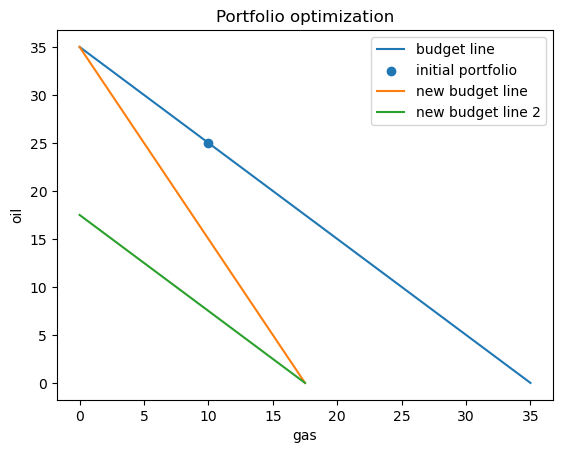

In [2]:
p=np.array([5,5])
e=np.array([25,10])
M = np.dot(p,e)
print(M)
x_max = M / p
print(x_max)
plt.plot([0,x_max[1]],[x_max[0],0],label='budget line')
plt.xlabel('gas')
plt.ylabel('oil')
plt.scatter(e[1],e[0],label='initial portfolio')

p=np.array([5,10])
x_max = M / p
plt.plot([0,x_max[1]],[x_max[0],0],label='new budget line')
plt.title('Portfolio optimization')

p=np.array([10,10])
x_max = M / p
plt.plot([0,x_max[1]],[x_max[0],0],label='new budget line 2')
plt.title('Portfolio optimization')

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


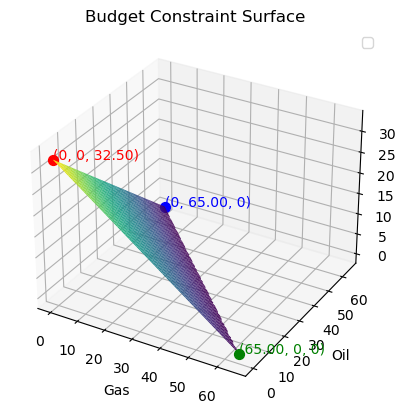

In [102]:
from mpl_toolkits.mplot3d import Axes3D

p_gas, p_oil, p_coal = 5, 5, 10
p = np.array([p_gas, p_oil, p_coal])
e = np.array([25, 10, 15])
M = np.dot(p,e)

gas = np.linspace(0, M / p_gas, 100)
oil = np.linspace(0, M / p_oil, 100)
gas, oil = np.meshgrid(gas, oil)

coal = (M - p_gas * gas - p_oil * oil) / p_coal
coal[coal < 0] = np.nan  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(gas, oil, coal, cmap='viridis', edgecolor='none')

ax.set_xlabel('Gas')
ax.set_ylabel('Oil')
ax.set_zlabel('Coal')

ax.set_title('Budget Constraint Surface')

ax.scatter(0, 0, M / p_coal, color='red', s=50)
ax.text(0, 0, M / p_coal, '(0, 0, {:.2f})'.format(M / p_coal), color='red')

ax.scatter(0, M / p_oil, 0, color='blue', s=50)
ax.text(0, M / p_oil, 0, '(0, {:.2f}, 0)'.format(M / p_oil), color='blue')

ax.scatter(M / p_gas, 0, 0, color='green', s=50)
ax.text(M / p_gas, 0, 0, '({:.2f}, 0, 0)'.format(M / p_gas), color='green')
ax.zaxis.labelpad = 10
ax.legend()


# Problem 6

## question a: budget constrain

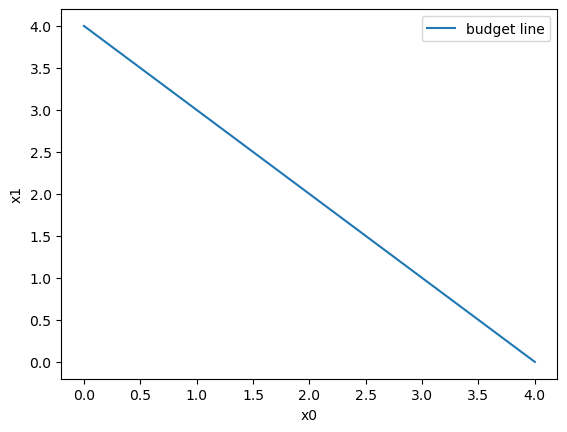

In [56]:
p=np.array([5,5])
M = 20
x_max = M / p
plt.plot([0,x_max[1]],[x_max[0],0],label='budget line')
plt.xlabel('x0')
plt.ylabel('x1')

plt.legend()

## question b: optimal portfolios

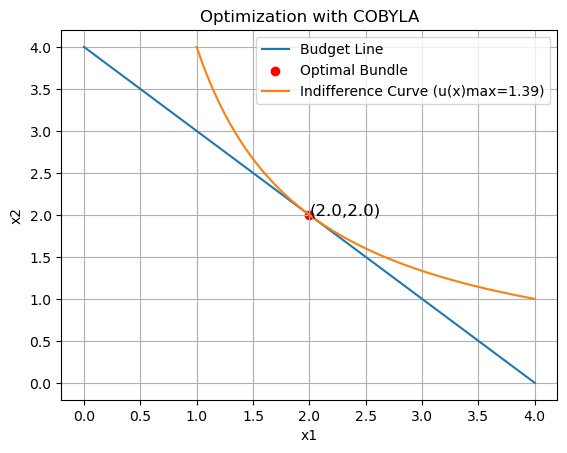

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cobyla

# Define the utility function
def u(x):
    return np.sum(np.log(x))

# Define the objective function (negative utility for minimization)
def objective(x):
    return -u(x)

# Define the constraint function (budget constraint)
def constraint(x):
    return M - np.dot(p, x)  # Ensure p[0]*x1 + p[1]*x2 <= M

# Parameters
M = 20
p = np.array([5, 5])
x_max = M / p

# Initial guess for optimization
x0 = np.array([x_max[0] / 2, x_max[1] / 2])

# Perform optimization
optimal_bundle = fmin_cobyla(objective, x0, [constraint], disp=True)

# Calculate utility of the optimal bundle
U_MAX = -objective(optimal_bundle)
u_bar = u(optimal_bundle)

# Define the function for the indifference curve
def inf_curve(x1, u_bar):
    return np.exp(u_bar - np.log(x1))

# Plotting
plt.figure()
plt.plot([0, x_max[1]], [x_max[0], 0], label='Budget Line')
plt.scatter(optimal_bundle[1], optimal_bundle[0], color='red', label='Optimal Bundle')
plt.text(optimal_bundle[1], optimal_bundle[0], f"({optimal_bundle[1]:.1f},{optimal_bundle[0]:.1f})", fontsize=12)
x1 = np.linspace(1, x_max[0], 200)
plt.plot(x1, inf_curve(x1, u_bar), label=f'Indifference Curve (u(x)max={U_MAX:.2f})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Optimization with COBYLA')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Julia\AppData\Local\Temp\ipykernel_30064\968517752.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(x))


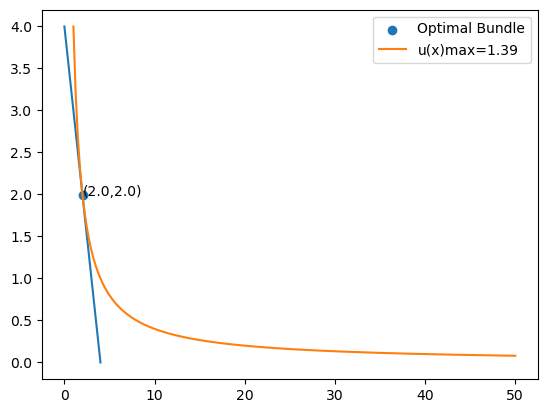

In [58]:
def u(x):
    return np.sum(np.log(x))
def inf_curve(x1,u_bar):
    return np.exp(u_bar-np.log(x1))
M = 20
p=np.array([5,5])
x_max = M / p
U_MAX = -1000
optimal_bundle= np.array([-1,-1])
x1_space = np.linspace(0,x_max[0],200)
x2_space = np.linspace(0,x_max[1],200)
for x1 in x1_space:
    for x2 in x2_space:
        u_val = u(np.array([x1,x2]))
        if u_val > U_MAX and p[0]*x1 + p[1]*x2 <= M:
            U_MAX = u_val
            optimal_bundle = np.array([x1,x2])
plt.plot([0,x_max[1]],[x_max[0],0])
plt.scatter(optimal_bundle[1],optimal_bundle[0],label='Optimal Bundle')
plt.text(optimal_bundle[1],optimal_bundle[0],"({:.1f},{:.1f})".format(optimal_bundle[1],optimal_bundle[0]))
u_bar = u(np.array([optimal_bundle[1],optimal_bundle[0]]))
x1=np.linspace(1,50,200)
plt.plot(x1,inf_curve(x1,u_bar),label=f'u(x)max={U_MAX:.2f}')  
plt.legend()


p0=1, optimal_bundle=[10.00009806  1.99998039], U_MAX=2.995732273457836
p0=2, optimal_bundle=[5.00009285 1.99996286], U_MAX=2.3025850926492177
p0=3, optimal_bundle=[3.33324758 2.00005145], U_MAX=1.8971199842241164
p0=4, optimal_bundle=[2.49992191 2.00006247], U_MAX=1.6094379114584905
p0=5, optimal_bundle=[2.00007071 1.99992929], U_MAX=1.3862943598698907
p0=6, optimal_bundle=[1.66660265 2.00007682], U_MAX=1.2039728028505263
p0=7, optimal_bundle=[1.42862955 1.99991863], U_MAX=1.0498221228432723
p0=8, optimal_bundle=[1.249947  2.0000848], U_MAX=0.916290730076402
p0=9, optimal_bundle=[1.11106255 2.00008742], U_MAX=0.7985076943073942


<Figure size 640x480 with 0 Axes>

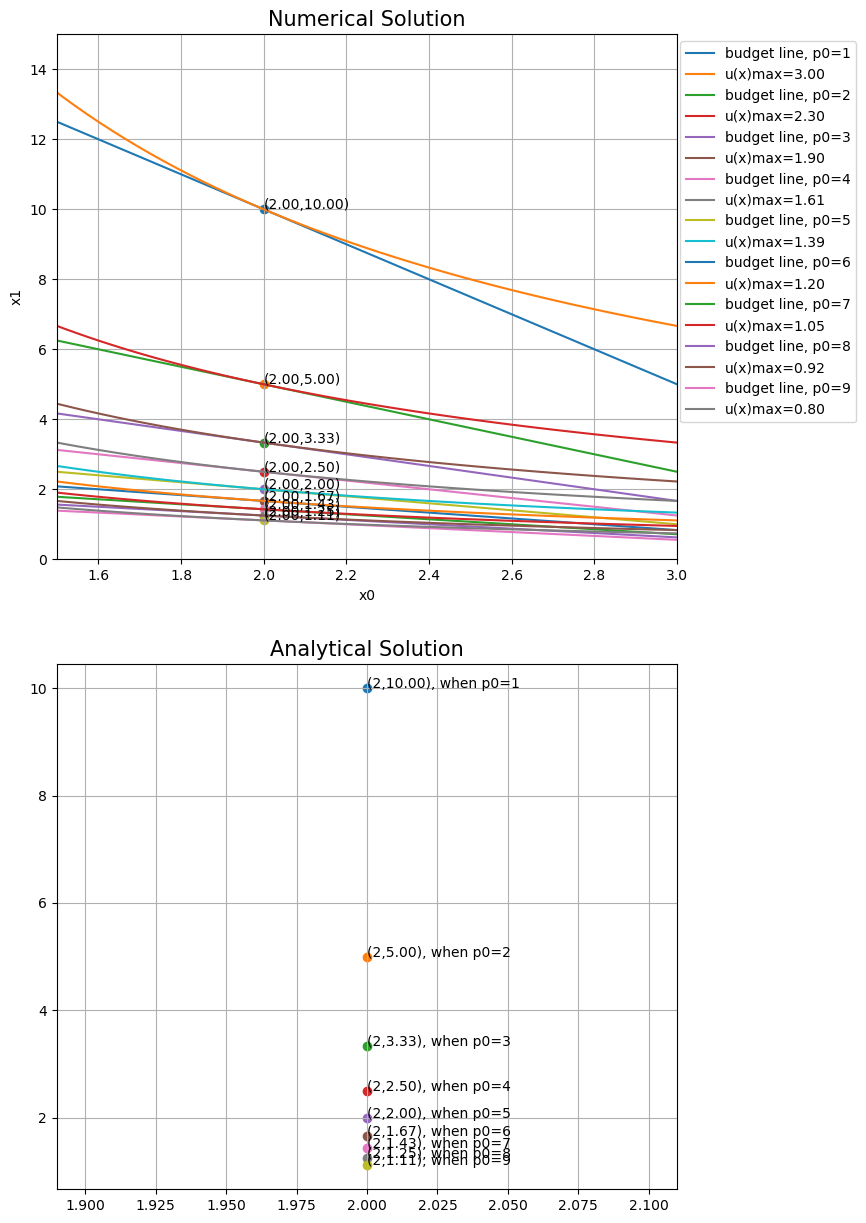

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cobyla

# Define the utility function
def u(x):
    return np.sum(np.log(x))
# Define the objective function (negative utility for minimization)
def objective(x):
    return -u(x)

# Define the constraint function (budget constraint)
def constraint(x, p, M):
    return M - np.dot(p, x)  # Ensure p[0]*x0 + p[1]*x1 <= M

# Define the function for the indifference curve
def inf_curve(x1, u_bar):
    return np.exp(u_bar - np.log(x1))

# Parameters
M = 20
pl = np.array(range(1, 10))

plt.suptitle('Optimal Bundle for different p0', fontsize=20)
plt.figure(figsize=(8, 15))

plt1 = plt.subplot(211)
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid(True)
plt.xlim(1.5,3)
plt.ylim(0,15)

# Loop over different values of p0
for p0 in pl:
    p = np.array([p0, 5])
    x_max = M / p
    x0_initial = np.array([x_max[0] / 2, x_max[1] / 2])
    
    # Perform optimization
    optimal_bundle = fmin_cobyla(objective, x0_initial, [lambda x: constraint(x, p, M)], disp=False)
    
    # Calculate utility of the optimal bundle
    U_MAX = -objective(optimal_bundle)
    u_bar = u(optimal_bundle)
    
    print(f'p0={p0}, optimal_bundle={optimal_bundle}, U_MAX={U_MAX}')
    
    plt1.plot([0, x_max[1]], [x_max[0], 0], label=f'budget line, p0={p0}')
    plt1.scatter(optimal_bundle[1], optimal_bundle[0])
    plt1.text(optimal_bundle[1], optimal_bundle[0], f"({optimal_bundle[1]:.2f},{optimal_bundle[0]:.2f})")
    x1 = np.linspace(1, 4, 100)
    plt1.plot(x1, inf_curve(x1, u_bar), label=f'u(x)max={U_MAX:.2f}')
    plt1.set_title('Numerical Solution', fontsize=15)
    plt1.legend(loc='upper right',bbox_to_anchor=(1.3, 1))

plt2 = plt.subplot(212)
for i in range(1, 10):
    x1 = 10 / i
    plt2.scatter(2, x1)
    plt2.text(2, x1, f"(2,{x1:.2f}), when p0={i}")
plt2.set_title('Analytical Solution', fontsize=15)
plt.grid(True)
plt.show()


C:\Users\Julia\AppData\Local\Temp\ipykernel_30064\592485569.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(x))


p0=1, optimal_bundle=[9.94974874 2.01005025], U_MAX=2.9957070213475783
p0=2, optimal_bundle=[4.97487437 2.01005025], U_MAX=2.302559840787633
p0=3, optimal_bundle=[3.31658291 2.01005025], U_MAX=1.8970947326794687
p0=4, optimal_bundle=[2.48743719 2.01005025], U_MAX=1.6094126602276875
p0=5, optimal_bundle=[1.98994975 2.01005025], U_MAX=1.3862691089134778
p0=6, optimal_bundle=[1.65829146 2.01005025], U_MAX=1.2039475521195233
p0=7, optimal_bundle=[1.42139268 2.01005025], U_MAX=1.0497968722922648


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

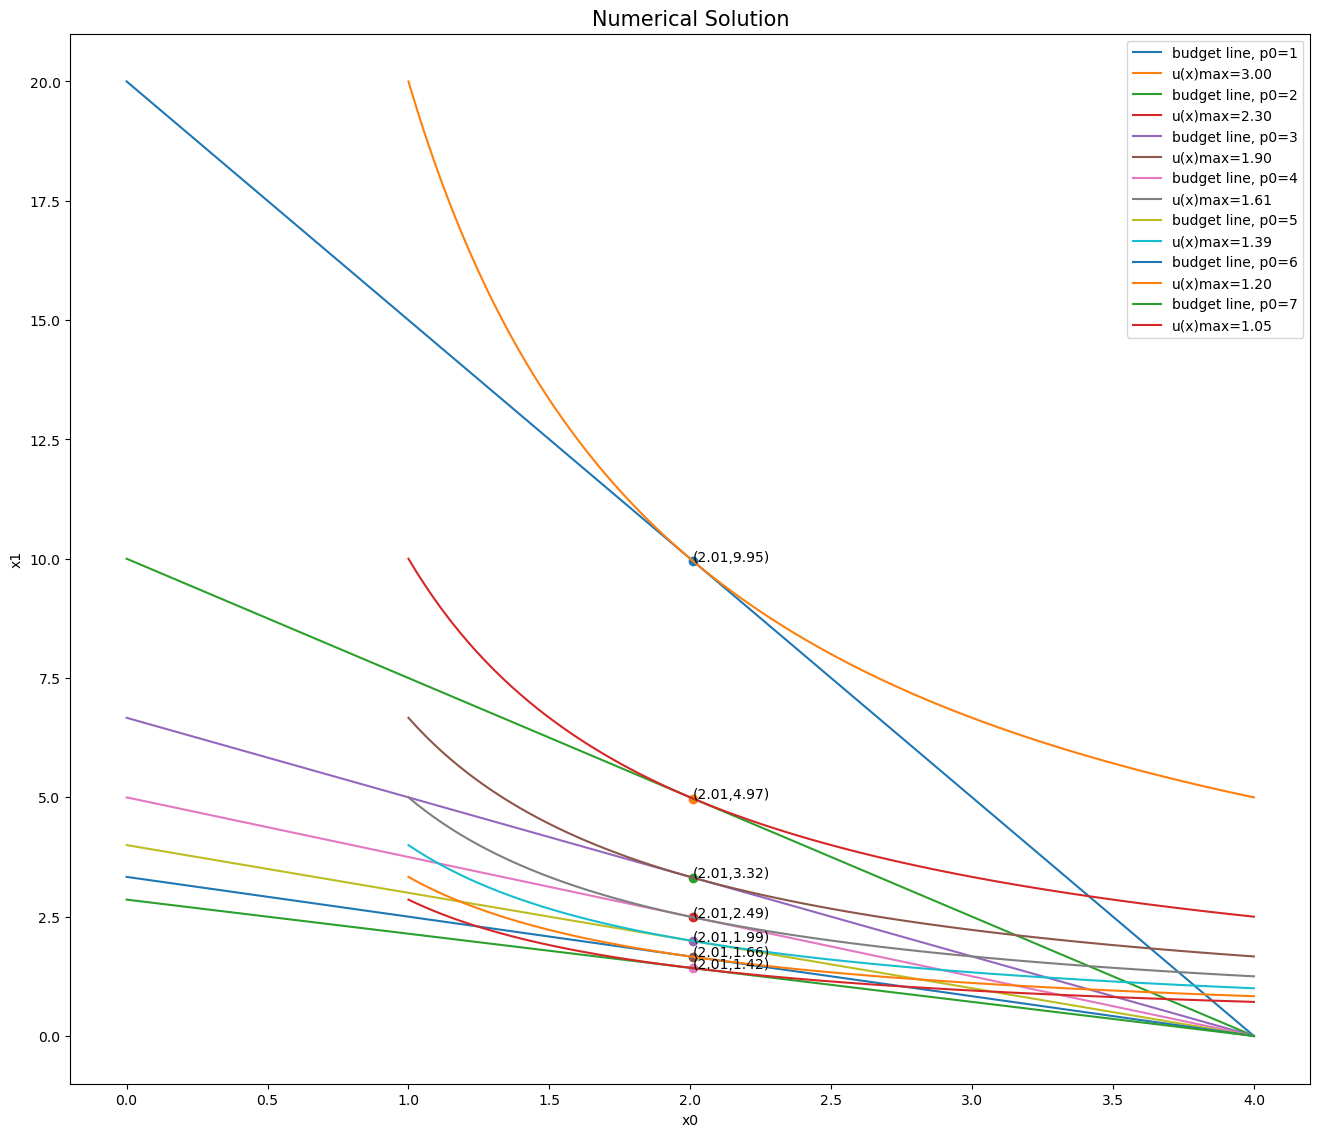

In [60]:
def u(x):
    return np.sum(np.log(x))
def inf_curve(x1,u_bar):
    return np.exp(u_bar-np.log(x1))
pl=np.array(range(1,10))
plt.suptitle('Optimal Bundle for different p0 ', fontsize=20)
plt.figure(figsize=(16,30))
plt1 = plt.subplot(211)
plt.xlabel('x0')
plt.ylabel('x1')
for p0 in pl:
    U_MAX = -1000
    M=20
    optimal_bundle= np.array([-1,-1])
    p=np.array([p0,5])
    x_max = M / p
    x1_space = np.linspace(0,x_max[0],200)
    x2_space = np.linspace(0,x_max[1],200)
    for x1 in x1_space:
        for x2 in x2_space:
            u_val = u(np.array([x1,x2]))
            if u_val > U_MAX and p[0]*x1 + p[1]*x2 <= M:
                U_MAX = u_val
                optimal_bundle = np.array([x1,x2])
    print(f'p0={p0}, optimal_bundle={optimal_bundle}, U_MAX={U_MAX}')
    plt1.plot([0,x_max[1]],[x_max[0],0],label=f'budget line, p0={p0}')
    plt1.scatter(optimal_bundle[1],optimal_bundle[0])
    plt1.text(optimal_bundle[1],optimal_bundle[0],"({:.2f},{:.2f})".format(optimal_bundle[1],optimal_bundle[0]))
    u_bar = u(np.array([optimal_bundle[1],optimal_bundle[0]]))
    x1=np.linspace(1,4,100)
    plt1.plot(x1,inf_curve(x1,U_MAX),label=f'u(x)max={U_MAX:.2f}')
    plt1.set_title('Numerical Solution',fontsize=15)
    plt1.legend()
plt2 = plt.subplot(212)
for i in range(1,10):
    x1= 10/i
    plt2.scatter(2,x1)
    plt2.text(2,x1,f"(2,{x1:.2f}),when p0={i}")
    plt2.set_title('Analytical Solution',fontsize=15)   

M=20, optimal_bundle=[2.00007071 1.99992929], U_MAX=1.3862943598698907
M=25, optimal_bundle=[2.49992929 2.50007071], U_MAX=1.8325814629483101
M=30, optimal_bundle=[3.00007071 2.99992929], U_MAX=2.1972245767806635
M=35, optimal_bundle=[3.49992929 3.50007071], U_MAX=2.505525936582573
M=40, optimal_bundle=[3.99992929 4.00007071], U_MAX=2.77258872192728
M=45, optimal_bundle=[4.50007071 4.49992929], U_MAX=3.0081547933056347
M=50, optimal_bundle=[4.99992929 5.00007071], U_MAX=3.218875824668201


<Figure size 640x480 with 0 Axes>

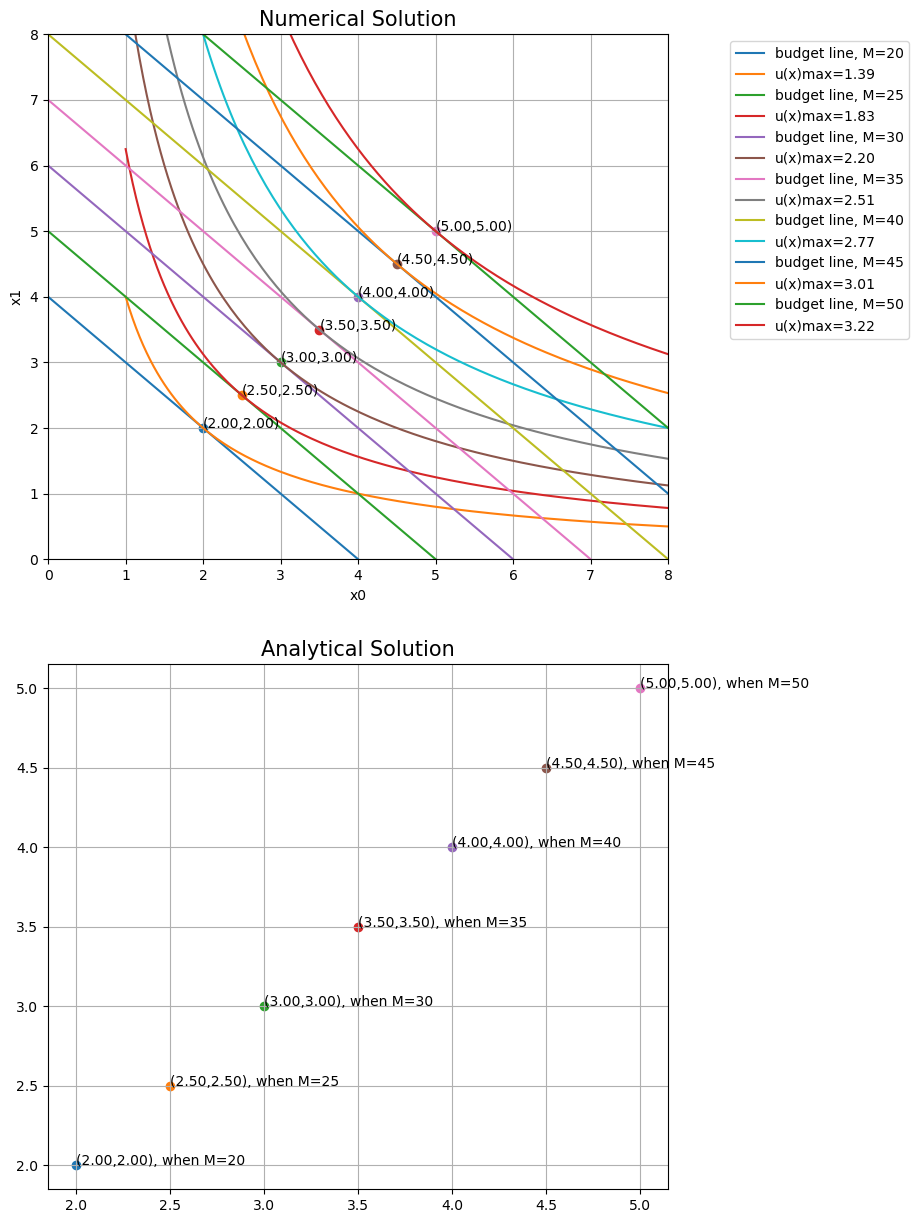

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cobyla

# Define the utility function
def u(x):
    return np.sum(np.log(x))

# Define the objective function (negative utility for minimization)
def objective(x):
    return -u(x)

# Define the constraint function (budget constraint)
def constraint(x, p, M):
    return M - np.dot(p, x)  # Ensure p[0]*x0 + p[1]*x1 <= M

# Define the function for the indifference curve
def inf_curve(x1, u_bar):
    return np.exp(u_bar - np.log(x1))

# Parameters
p = np.array([5, 5])
M_list = np.array(range(20, 51, 5))

plt.suptitle('Optimal Bundle for different M', fontsize=20)
plt.figure(figsize=(8, 15))

plt1 = plt.subplot(211)
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(0, 8)
# Loop over different values of M
for M in M_list:
    x_max = M / p
    x0_initial = np.array([x_max[0] / 2, x_max[1] / 2])
    
    # Perform optimization
    optimal_bundle = fmin_cobyla(objective, x0_initial, [lambda x: constraint(x, p, M)], disp=False)
    
    # Calculate utility of the optimal bundle
    U_MAX = -objective(optimal_bundle)
    u_bar = u(optimal_bundle)
    
    print(f'M={M}, optimal_bundle={optimal_bundle}, U_MAX={U_MAX}')
    
    plt1.plot([0, x_max[1]], [x_max[0], 0], label=f'budget line, M={M}')
    plt1.scatter(optimal_bundle[1], optimal_bundle[0])
    plt1.text(optimal_bundle[1], optimal_bundle[0], f"({optimal_bundle[1]:.2f},{optimal_bundle[0]:.2f})")
    x1 = np.linspace(1, 10, 200)
    plt1.plot(x1, inf_curve(x1, u_bar), label=f'u(x)max={U_MAX:.2f}')
    plt1.set_title('Numerical Solution', fontsize=15)
    plt1.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

plt2 = plt.subplot(212)
for M in M_list:
    x0 = M / 5 / 2
    x1 = M / 5 / 2
    plt2.scatter(x0, x1)
    plt2.text(x0, x1, f"({x0:.2f},{x1:.2f}), when M={M}")
plt2.set_title('Analytical Solution', fontsize=15)
plt.grid(True)

plt.show()


C:\Users\Julia\AppData\Local\Temp\ipykernel_29012\3636310663.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(x))


M=20, optimal_bundle=[1.98994975 2.01005025], U_MAX=1.3862691089134778
M=25, optimal_bundle=[2.48743719 2.51256281], U_MAX=1.8325562115418976
M=30, optimal_bundle=[2.98492462 3.01507538], U_MAX=2.197199325129806
M=35, optimal_bundle=[3.48241206 3.51758794], U_MAX=2.505500684784323
M=40, optimal_bundle=[3.9798995 4.0201005], U_MAX=2.7725634700333686
M=45, optimal_bundle=[4.4321608 4.5678392], U_MAX=3.0079275007352857
M=50, optimal_bundle=[4.97487437 5.02512563], U_MAX=3.218850572661788


<Figure size 640x480 with 0 Axes>

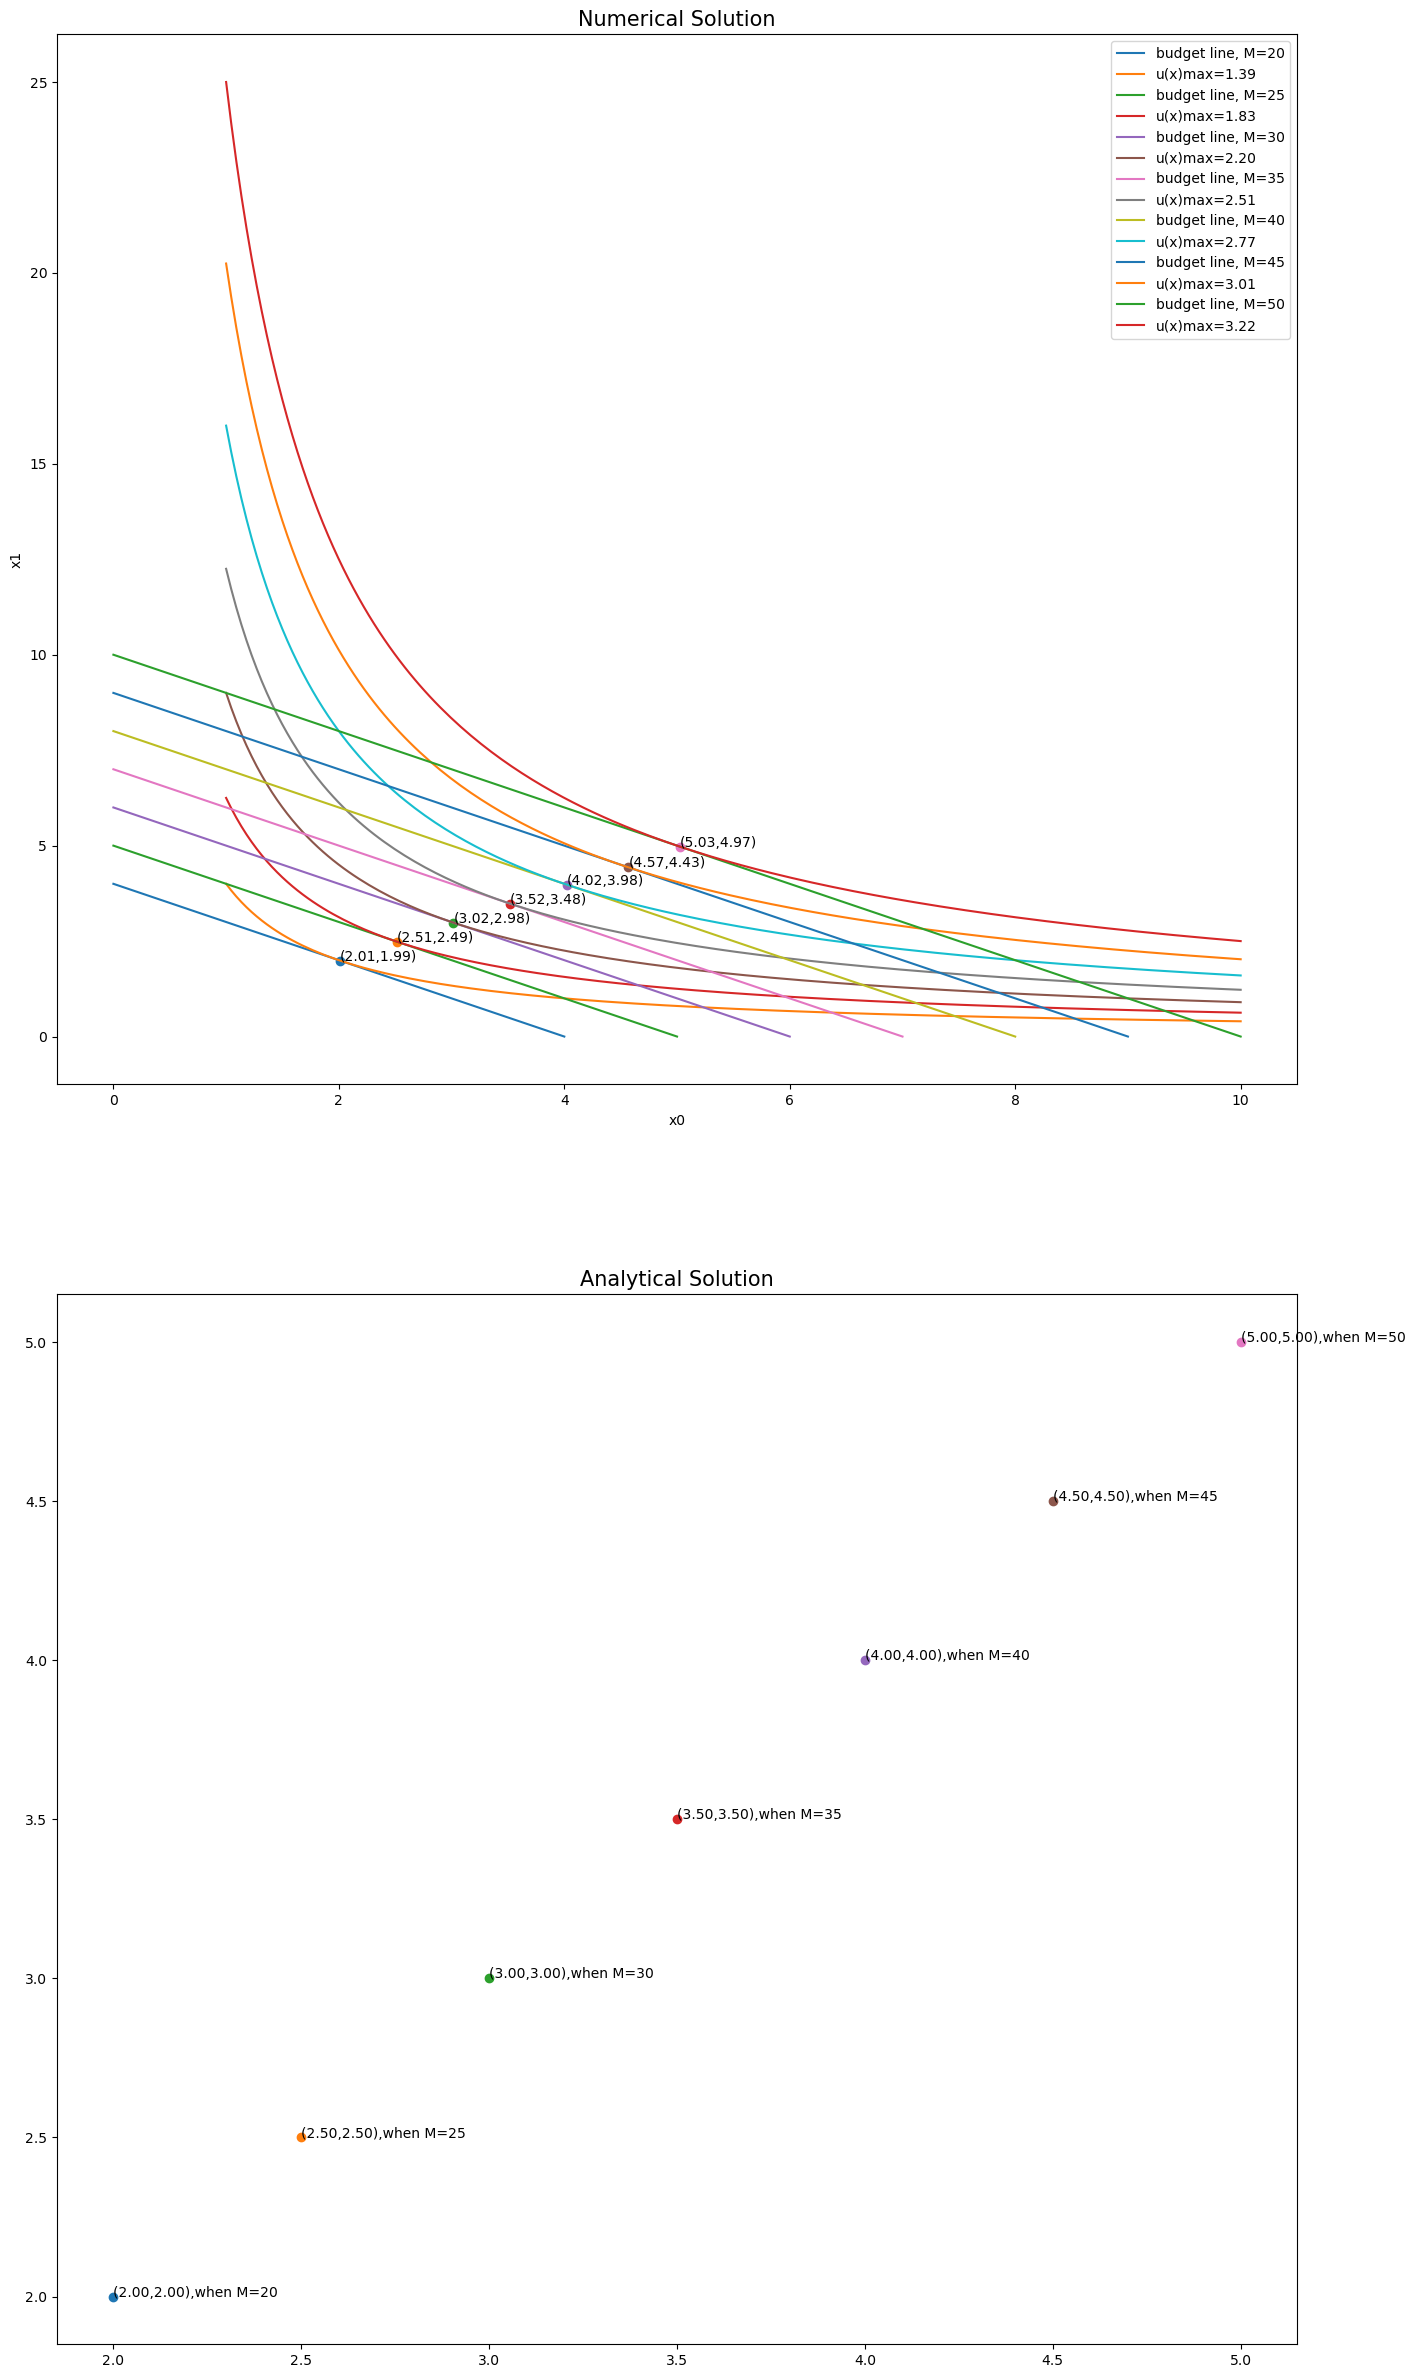

In [188]:
def u(x):
    return np.sum(np.log(x))
def inf_curve(x1,u_bar):
    return np.exp(u_bar-np.log(x1))
M_list=np.array(range(20,51,5))
plt.suptitle('Optimal Bundle for different p0 ', fontsize=20)
plt.figure(figsize=(16,30))
p=np.array([5,5])
plt1 = plt.subplot(211)
plt.xlabel('x0')
plt.ylabel('x1')
for M in M_list:
    U_MAX = -1000
    optimal_bundle= np.array([-1,-1])
    x_max = M / p
    x1_space = np.linspace(0,x_max[0],200)
    x2_space = np.linspace(0,x_max[1],200)
    for x1 in x1_space:
        for x2 in x2_space:
            u_val = u(np.array([x1,x2]))
            if u_val > U_MAX and p[0]*x1 + p[1]*x2 <= M:
                U_MAX = u_val
                optimal_bundle = np.array([x1,x2])
    print(f'M={M}, optimal_bundle={optimal_bundle}, U_MAX={U_MAX}')
    plt1.plot([0,x_max[1]],[x_max[0],0],label=f'budget line, M={M}')
    plt1.scatter(optimal_bundle[1],optimal_bundle[0])
    plt1.text(optimal_bundle[1],optimal_bundle[0],"({:.2f},{:.2f})".format(optimal_bundle[1],optimal_bundle[0]))
    u_bar = u(np.array([optimal_bundle[1],optimal_bundle[0]]))
    x1=np.linspace(1,10,200)
    plt1.plot(x1,inf_curve(x1,U_MAX),label=f'u(x)max={U_MAX:.2f}')
    plt1.set_title('Numerical Solution',fontsize=15)
    plt1.legend()
plt2 = plt.subplot(212)
for M in M_list:
    x0 = M/5/2
    x1 = M/5/2
    plt2.scatter(x0,x1)
    plt2.text(x0,x1,f"({x0:.2f},{x1:.2f}),when M={M}")
    plt2.set_title('Analytical Solution',fontsize=15)   

p0=1, optimal_bundle=[2.77530145 3.44493971], U_MAX=-0.30587450916530723
p0=2, optimal_bundle=[2.21851632 3.11259347], U_MAX=-0.3518029657015006
p0=3, optimal_bundle=[1.91801145 2.84919313], U_MAX=-0.3982182197617158
p0=4, optimal_bundle=[1.71420897 2.62863282], U_MAX=-0.44659990741146693
p0=5, optimal_bundle=[1.56165235 2.43834765], U_MAX=-0.49763749145152614
p0=6, optimal_bundle=[1.44016693 2.27179969], U_MAX=-0.5517734998112054
p0=7, optimal_bundle=[1.33982339 2.12424725], U_MAX=-0.6093463278902702
p0=8, optimal_bundle=[1.25496998 1.99204803], U_MAX=-0.6706429718523786
p0=9, optimal_bundle=[1.18163595 1.87305529], U_MAX=-0.7359225566658751


<Figure size 640x480 with 0 Axes>

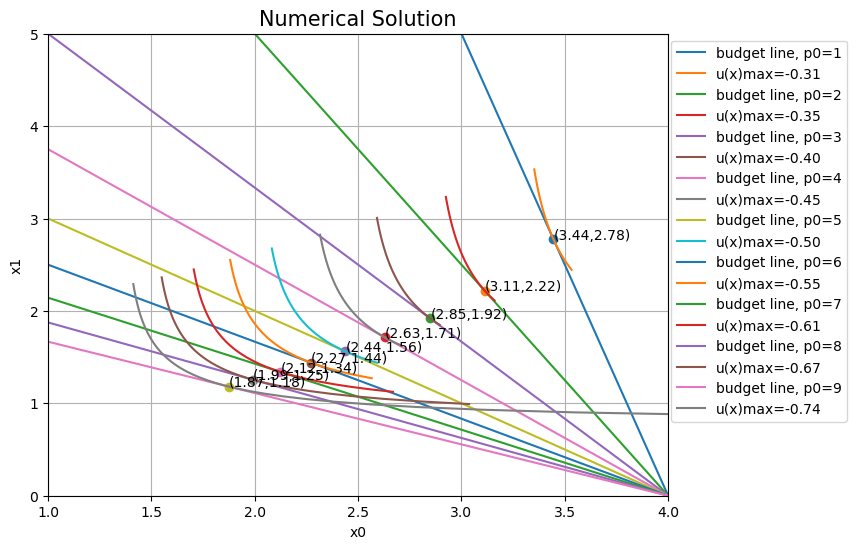

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

# Define the utility function
def u(theta, x):
    return np.sum((x**(1-theta))/(1-theta))

# Define the objective function (negative utility for minimization)
def objective(x):
    return -u(theta, x)

# Define the constraint function (budget constraint)
def constraint(x, p, M):
    return M - np.dot(p, x)  # Ensure p[0]*x0 + p[1]*x1 <= M

# Define the function for the indifference curve
def inf_curve(x1_list, u_bar):
    x2_list = []
    for x1 in x1_list:
        x2 = sp.newton(lambda x2: u_bar - u(theta, np.array([x1, x2])), x1)
        x2_list.append(x2)
    return x2_list

# Parameters
theta = np.array([4, 2])
pl = np.array(range(1, 10))

plt.suptitle('Optimal Bundle for different p0', fontsize=20)
plt.figure(figsize=(8, 6))

plt1 = plt.subplot(111)
plt.xlabel('x0')
plt.ylabel('x1')
plt.xlim(1, 4)
plt.ylim(0, 5)
# Loop over different values of p0
for p0 in pl:
    M = 20
    p = np.array([p0, 5])
    x_max = M / p
    x0_initial = np.array([x_max[0] / 2, x_max[1] / 2])
    
    # Perform optimization
    optimal_bundle = sp.fmin_cobyla(objective, x0_initial, [lambda x: constraint(x, p, M)], disp=False)
    
    # Calculate utility of the optimal bundle
    U_MAX = -objective(optimal_bundle)
    u_bar = u(theta, optimal_bundle)
    
    print(f'p0={p0}, optimal_bundle={optimal_bundle}, U_MAX={U_MAX}')
    
    plt1.plot([0, x_max[1]], [x_max[0], 0], label=f'budget line, p0={p0}')
    plt1.scatter(optimal_bundle[1], optimal_bundle[0])
    plt1.text(optimal_bundle[1], optimal_bundle[0], f"({optimal_bundle[1]:.2f},{optimal_bundle[0]:.2f})")
    
    x1 = np.linspace(max(optimal_bundle[1] - 1,0), optimal_bundle[1]+np.exp(-1 * (optimal_bundle[1] - 1)), 50)
    plt1.plot(inf_curve(x1, u_bar), x1, label=f'u(x)max={U_MAX:.2f}')
    
    plt1.set_title('Numerical Solution', fontsize=15)
    plt1.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()


C:\Users\Julia\AppData\Local\Temp\ipykernel_29012\2201442890.py:4: RuntimeWarning: divide by zero encountered in power
  return np.sum((x**(1-theta))/(1-theta))


p0=1, optimal_bundle=[2.81407035 3.43718593], U_MAX=-0.3058936850723215
[3.535217971508546, 3.521286062403752, 3.508341762032717, 3.4962960745775646, 3.485069782154154, 3.4745921748053332, 3.4647999708000237, 3.455636394985813, 3.447050389024626, 3.4389959321639108, 3.4314314550425915, 3.424319332116264, 3.4176254407737168, 3.4113187772325073, 3.405371120942516, 3.3997567405687126, 3.394452135727046, 3.389435809557009, 3.3846880679677263, 3.3801908420207476, 3.3759275304352925, 3.3718828596392902, 3.368042759157206, 3.3643942504355357, 3.360925347468876, 3.3576249678116863, 3.3544828527498796, 3.3514894955675363, 3.3486360769819337, 3.345914406938253, 3.3433168720569277, 3.340836388114146, 3.3384663570116193, 3.3362006277571554, 3.3340334610343927, 3.331959496989335, 3.329973725904389, 3.3280714614681046, 3.326248316381604, 3.3245001800715133, 3.322823198304379, 3.3212137545197877, 3.319668452718947, 3.3181841017627223, 3.316757700948368, 3.315386426747714, 3.3140676206014654, 3.312798

<Figure size 640x480 with 0 Axes>

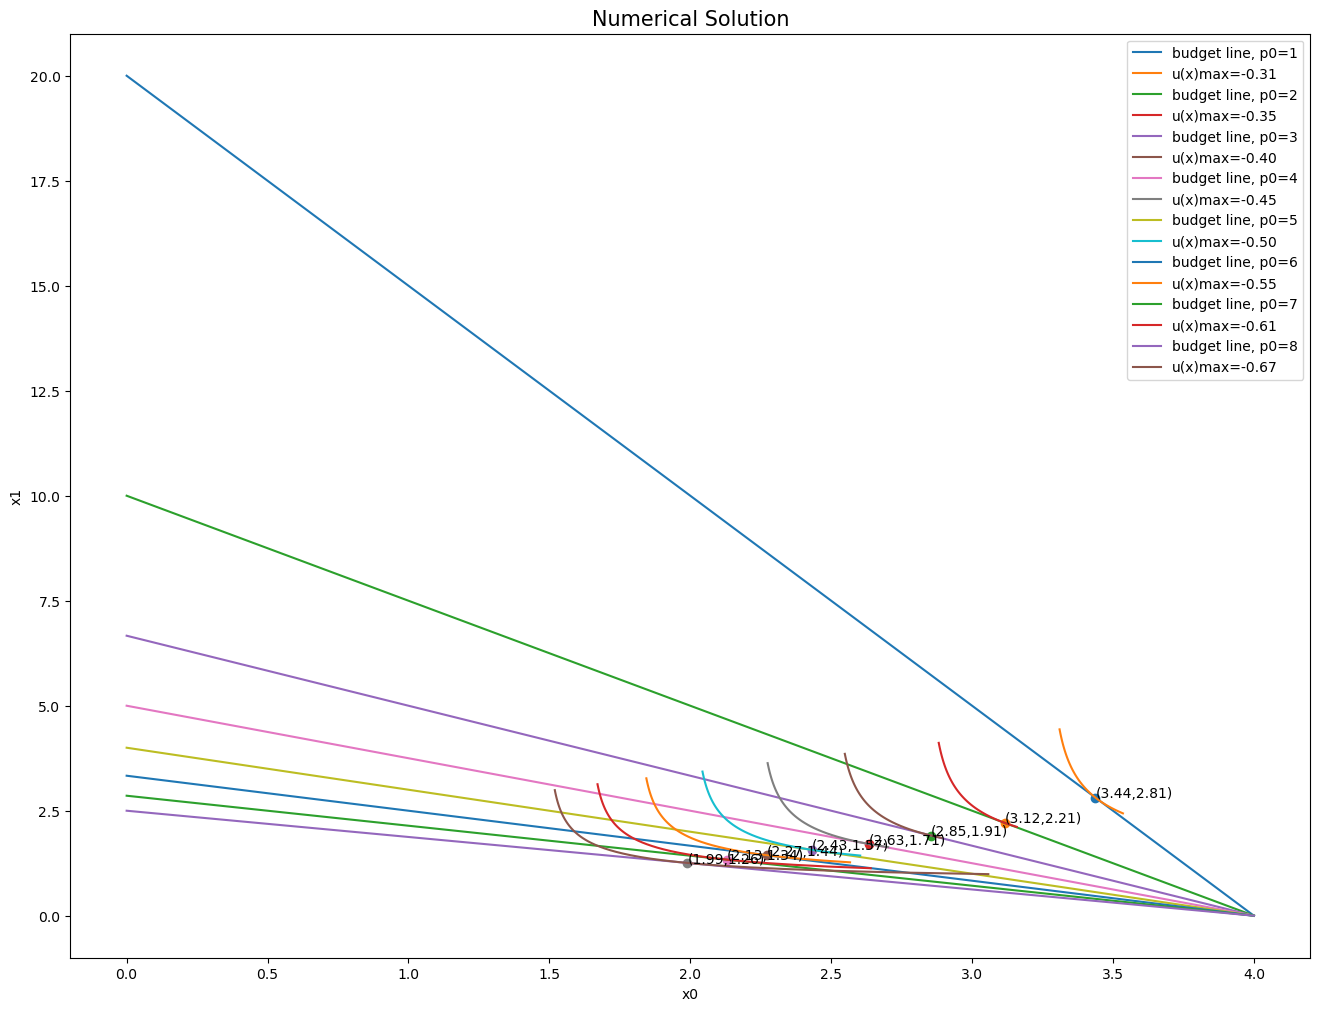

In [199]:
import scipy.optimize as sp

def u(theta,x):
    return np.sum((x**(1-theta))/(1-theta))
def inf_curve(x1_list,u_bar):
    x2_list = []
    for x1 in x1_list:
        x2_list.append(sp.newton(lambda x2: u_bar-u(theta,np.array([x1,x2])),3))
    print(x2_list)
    return x2_list
theta = np.array([4,2])
pl=np.array(range(1,9))
plt.suptitle('Optimal Bundle for different p0 ', fontsize=20)
plt.figure(figsize=(16,12))
plt1 = plt.subplot(111)
plt.xlabel('x0')
plt.ylabel('x1')
for p0 in pl:
    U_MAX = -1000
    M=20
    optimal_bundle= np.array([0,0])
    p=np.array([p0,5])
    x_max = M / p
    x1_space = np.linspace(0,x_max[0],200)
    x2_space = np.linspace(0,x_max[1],200)
    for x1 in x1_space:
        for x2 in x2_space:
            u_val = u(theta,np.array([x1,x2]))
            if u_val > U_MAX and p[0]*x1 + p[1]*x2 <= M:
                U_MAX = u_val
                optimal_bundle = np.array([x1,x2])
    print(f'p0={p0}, optimal_bundle={optimal_bundle}, U_MAX={U_MAX}')
    plt1.plot([0,x_max[1]],[x_max[0],0],label=f'budget line, p0={p0}')
    plt1.scatter(optimal_bundle[1],optimal_bundle[0])
    plt1.text(optimal_bundle[1],optimal_bundle[0],"({:.2f},{:.2f})".format(optimal_bundle[1],optimal_bundle[0]))
    u_bar = u(theta,np.array([optimal_bundle[1],optimal_bundle[0]]))
    x1=np.linspace(optimal_bundle[1]-1,optimal_bundle[1]+1,50)
    plt1.plot(inf_curve(x1,U_MAX),x1,label=f'u(x)max={U_MAX:.2f}')
    plt1.set_title('Numerical Solution',fontsize=15)
    plt1.legend()

M=20, optimal_bundle=[1.56165235 2.43834765], U_MAX=-0.49763749145152614
M=25, optimal_bundle=[1.7911981 3.2088019], U_MAX=-0.36964545390954134
M=30, optimal_bundle=[2.00007561 3.99992439], U_MAX=-0.2916666671132186
M=35, optimal_bundle=[2.19250515 4.80749485], U_MAX=-0.23963546161432428
M=40, optimal_bundle=[2.37219931 5.62780069], U_MAX=-0.2026596901047348
M=45, optimal_bundle=[2.54130041 6.45869959], U_MAX=-0.17513996668192794
M=50, optimal_bundle=[2.70148698 7.29851302], U_MAX=-0.15392134904877464


<Figure size 640x480 with 0 Axes>

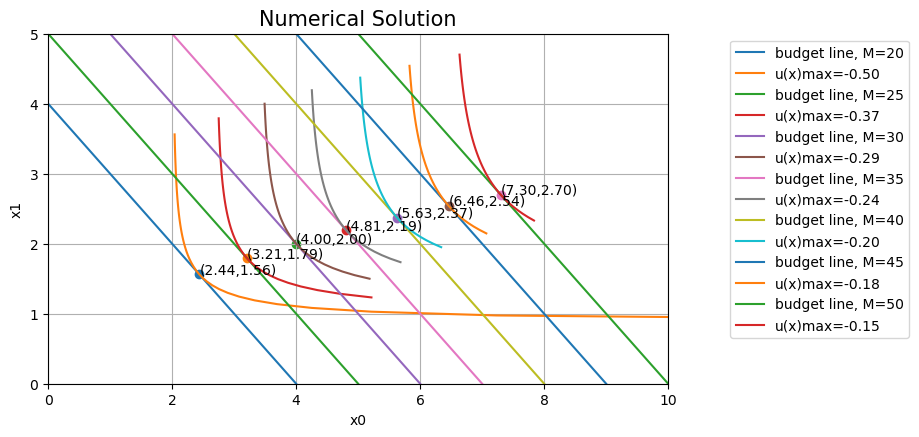

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

# Define the utility function
def u(theta, x):
    return np.sum((x**(1-theta))/(1-theta))

# Define the objective function (negative utility for minimization)
def objective(x):
    return -u(theta, x)

# Define the constraint function (budget constraint)
def constraint(x, p, M):
    return M - np.dot(p, x)  # Ensure p[0]*x0 + p[1]*x1 <= M

# Define the function for the indifference curve
def inf_curve(x1_list, u_bar):
    x2_list = []
    for x1 in x1_list:
        x2 = sp.newton(lambda x2: u_bar - u(theta, np.array([x1, x2])), x1)
        x2_list.append(x2)
    return x2_list

# Parameters
theta = np.array([4, 2])
M_list = np.array(range(20, 51, 5))
p = np.array([5, 5])

plt.suptitle('Optimal Bundle for different M', fontsize=20)
plt.figure(figsize=(8, 10))

plt1 = plt.subplot(211)
plt.xlabel('x0')
plt.ylabel('x1')
plt.xlim(0, 10)
plt.ylim(0, 5)
# Loop over different values of M
for M in M_list:
    x_max = M / p
    x0_initial = np.array([x_max[0] / 2, x_max[1] / 2])
    
    # Perform optimization
    optimal_bundle = sp.fmin_cobyla(objective, x0_initial, [lambda x: constraint(x, p, M)], disp=False)
    
    # Calculate utility of the optimal bundle
    U_MAX = -objective(optimal_bundle)
    u_bar = u(theta, optimal_bundle)
    
    print(f'M={M}, optimal_bundle={optimal_bundle}, U_MAX={U_MAX}')
    
    plt1.plot([0, x_max[1]], [x_max[0], 0], label=f'budget line, M={M}')
    plt1.scatter(optimal_bundle[1], optimal_bundle[0])
    plt1.text(optimal_bundle[1], optimal_bundle[0], f"({optimal_bundle[1]:.2f},{optimal_bundle[0]:.2f})")
    
    x1 = np.linspace(optimal_bundle[0]-1/optimal_bundle[0], optimal_bundle[0]+2, 50)
    plt1.plot(inf_curve(x1, u_bar), x1, label=f'u(x)max={U_MAX:.2f}')
    
    plt1.set_title('Numerical Solution', fontsize=15)
    plt1.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.grid(True)
plt.show()


C:\Users\Julia\AppData\Local\Temp\ipykernel_29012\3700672233.py:4: RuntimeWarning: divide by zero encountered in power
  return np.sum((x**(1-theta))/(1-theta))


M=20, optimal_bundle=[1.5678392 2.4321608], U_MAX=-0.49764867683222364
[43.73502053183861, 10.287880641356915, 6.377724196345074, 4.875008864517706, 4.086011295022196, 3.603515855151968, 3.2802928842812866, 3.050198641015245, 2.8791267969801555, 2.7477190695638254, 2.6441804409242247, 2.56092081857594, 2.4928395252877, 2.436385780685919, 2.389014420527925, 2.3488556230657642, 2.314506542133362, 2.2848954187435604, 2.2591903905451027, 2.2367367539475955, 2.2170128465866066, 2.1995984167984863, 2.184151550688324, 2.1703915787762016, 2.1580862343962393, 2.1470418833622578, 2.137096004197425, 2.1281113392367796, 2.1199713011675385, 2.1125763333029717, 2.105841001776427, 2.099691654728752, 2.094064524564161, 2.0889041792493557, 2.0841622506665964, 2.0797963844348626, 2.0757693679381117, 2.0720484026411556, 2.068604493912163, 2.065411937067949, 2.0624478826222234, 2.0596919670470877, 2.057125997975787, 2.054733684844959, 2.052500407621452, 2.0504130175760062, 2.048459665125187, 2.04662965061

<Figure size 640x480 with 0 Axes>

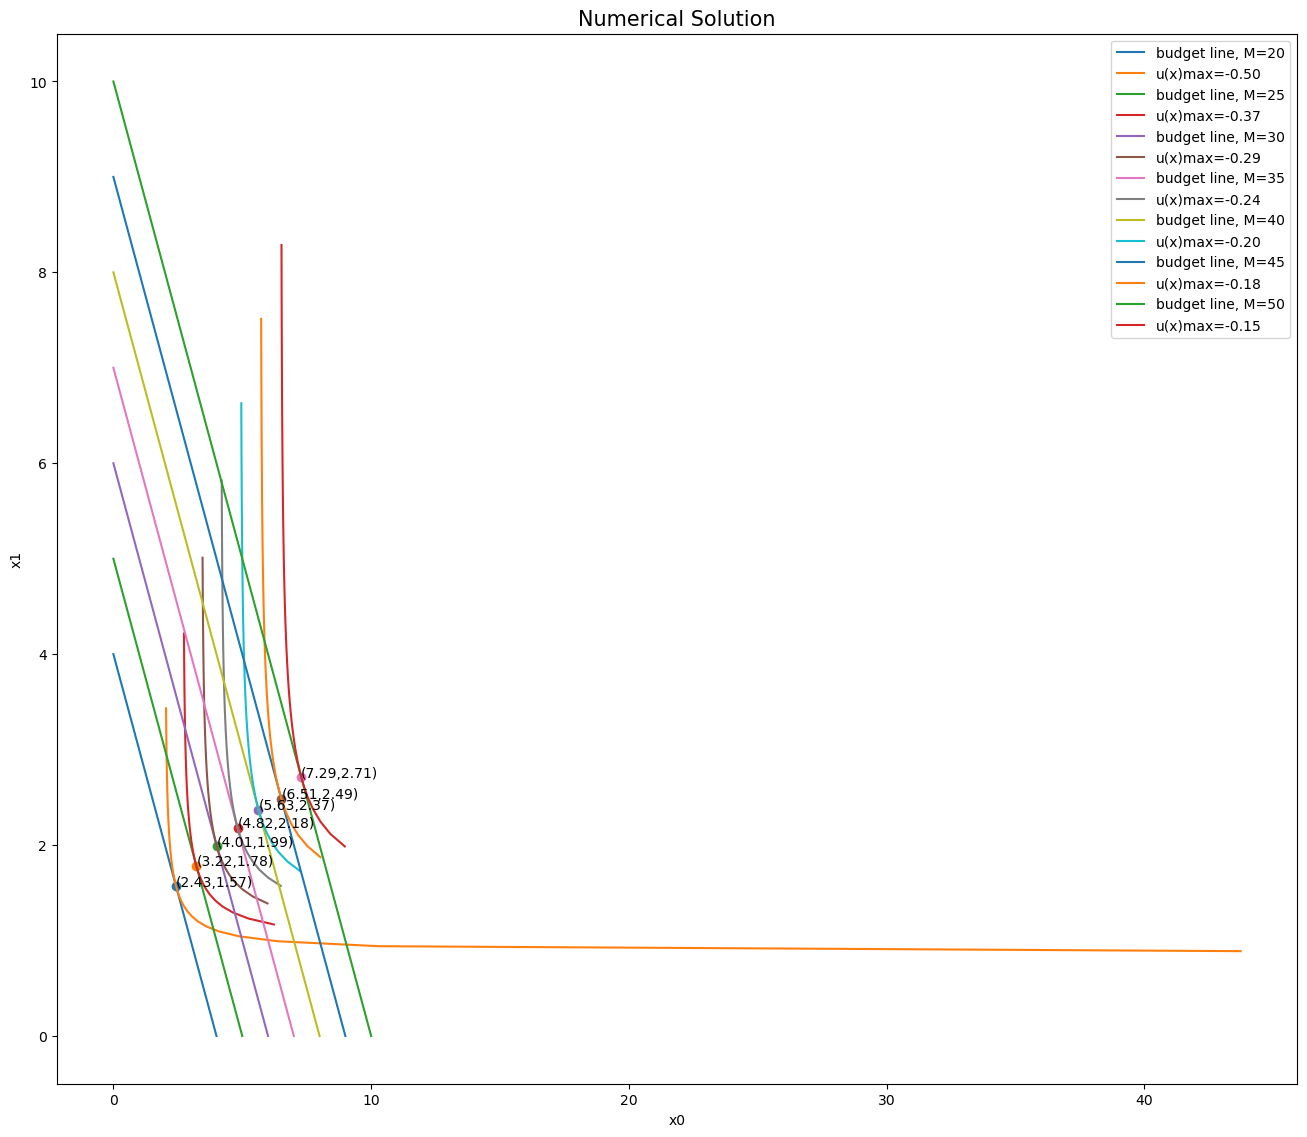

In [215]:
import scipy.optimize as sp

def u(theta,x):
    return np.sum((x**(1-theta))/(1-theta))
def inf_curve(x1_list,u_bar):
    x2_list = []
    for x1 in x1_list:
        x2_list.append(sp.newton(lambda x2: u_bar-u(theta,np.array([x1,x2])),3))
    print(x2_list)
    return x2_list
theta = np.array([4,2])
M_list=np.array(range(20,51,5))
plt.suptitle('Optimal Bundle for different p0 ', fontsize=20)
plt.figure(figsize=(16,30))
p=np.array([5,5])
plt1 = plt.subplot(211)
plt.xlabel('x0')
plt.ylabel('x1')
for M in M_list:
    U_MAX = -1000
    optimal_bundle= np.array([-1,-1])
    x_max = M / p
    x1_space = np.linspace(0,x_max[0],200)
    x2_space = np.linspace(0,x_max[1],200)
    for x1 in x1_space:
        for x2 in x2_space:
            u_val = u(theta,np.array([x1,x2]))
            if u_val > U_MAX and p[0]*x1 + p[1]*x2 <= M:
                U_MAX = u_val
                optimal_bundle = np.array([x1,x2])
    print(f'M={M}, optimal_bundle={optimal_bundle}, U_MAX={U_MAX}')
    plt1.plot([0,x_max[1]],[x_max[0],0],label=f'budget line, M={M}')
    plt1.scatter(optimal_bundle[1],optimal_bundle[0])
    plt1.text(optimal_bundle[1],optimal_bundle[0],"({:.2f},{:.2f})".format(optimal_bundle[1],optimal_bundle[0]))
    u_bar = u(theta,np.array([optimal_bundle[1],optimal_bundle[0]]))
    x1=np.linspace(np.log(optimal_bundle[1]),optimal_bundle[1]+1,50)
    plt1.plot(inf_curve(x1,U_MAX),x1,label=f'u(x)max={U_MAX:.2f}')
    plt1.set_title('Numerical Solution',fontsize=15)
    plt1.legend()